In [1]:
%run config.ipynb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv("data/yelp_academic_dataset_sample005_filter.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400807 entries, 0 to 400806
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   review_id                   400807 non-null  object 
 1   user_id                     400807 non-null  object 
 2   business_id                 400807 non-null  object 
 3   review_stars                400807 non-null  int64  
 4   review_text                 400807 non-null  object 
 5   review_text_after_cleaning  400807 non-null  object 
 6   user_review_count           400807 non-null  int64  
 7   user_elite                  400807 non-null  int64  
 8   user_friends                400807 non-null  object 
 9   user_fans                   400807 non-null  int64  
 10  user_average_stars          400807 non-null  float64
 11  user_total_compliments      400807 non-null  int64  
 12  business_name               400807 non-null  object 
 13  business_categ

In [3]:
df.head(1)

,review_id,user_id,business_id,review_stars,review_text,review_text_after_cleaning,user_review_count,user_elite,user_friends,user_fans,user_average_stars,user_total_compliments,business_name,business_categories,business_stars,to_recommend,num_user_friends
0,yNB39szX3M8mTEzTtsgoCw,Y1iCYGvLf4ifPoXlKLGq-w,o2Qh4SiGYJ7BK4hP7dfkrw,5,This is an amazing indian Bistro!!I If I do sa...,amaz bistroi say myself never cuisin glad expe...,1,0,None,0,5.0,0,Saffron Indian Bistro,"Restaurants, Indian",4.5,True,0


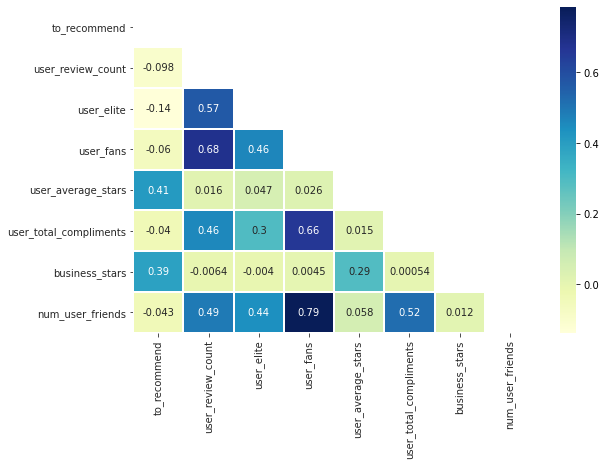

In [4]:
data = df[["to_recommend", "review_text_after_cleaning", "user_review_count", "user_elite", "user_fans", "user_average_stars", \
           "user_total_compliments", "business_stars", "num_user_friends"]]
corr_heatmap(data)

In [9]:
X = data[["review_text_after_cleaning", "user_review_count", "user_elite", "user_fans", "user_average_stars", "user_total_compliments", "business_stars", "num_user_friends"]]
y = data["to_recommend"]

### Split Train and Test Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_text = X_train["review_text_after_cleaning"]
X_test_text = X_test["review_text_after_cleaning"]
X_train.drop("review_text_after_cleaning", axis=1, inplace=True)
X_test.drop("review_text_after_cleaning", axis=1, inplace=True)

## Word Embedding

In [13]:
MAX_VOCAB_SIZE = 50000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train_text)
sequences_train = tokenizer.texts_to_sequences(X_train_text)
sequences_test = tokenizer.texts_to_sequences(X_test_text)

In [14]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 120803 unique tokens.


In [15]:
X_train_text = pad_sequences(sequences_train)
print('Shape of data train tensor:', X_train_text.shape)

T = X_train_text.shape[1]

X_test_text = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', X_test_text.shape)

Shape of data train tensor: (268540, 503)
Shape of data test tensor: (132267, 503)


In [16]:
X_train_text

array([[    0,     0,     0, ...,   104,   172,   674],
       [    0,     0,     0, ...,   682,   311,    11],
       [    0,     0,     0, ...,  1755,   564,    76],
       ...,
       [    0,     0,     0, ..., 10897,    37,    20],
       [    0,     0,     0, ...,   568,   810,   471],
       [    0,     0,     0, ...,   145,    70,   356]])

### Stochastic Gradient Descent

In [17]:
sgd = SGDClassifier().fit(X_train, y_train)
sgd.score(X_test, y_test)

0.6922210377494008

In [18]:
sgd = SGDClassifier().fit(X_train_text, y_train)
sgd.score(X_test_text, y_test)

0.5171206725789501

### Decision Tree

In [19]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_test, y_test)

0.6888566309056681

In [20]:
dt = DecisionTreeClassifier().fit(X_train_text, y_train)
dt.score(X_test_text, y_test)

0.559754133684139

### Multinomial Naive Bayes

In [21]:
mnb = MultinomialNB().fit(X_train_text, y_train)
mnb.score(X_test_text, y_test)

0.5231010002494954